Attribute Content:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Forest_dataset_updated.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 26.9+ KB


In [9]:
# Removing the null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [10]:
# Removing white spaces in the column names
df.columns = df.columns.str.strip()

In [11]:
df.dropna(subset=['Classes'], inplace=True)

In [12]:
# Changing the data type
df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['day'].isnull().sum()
df.dropna(subset=['day'], inplace=True)

In [13]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(6), object(8)
memory usage: 28.5+ KB


In [15]:
object = [feature for feature in df.columns if df[feature].dtype == 'object']
for col in object:
    if col!= 'Classes':
        df[col] = df[col].astype(float)

In [16]:
# Creating a new feature based on region and setting type as integer
df.loc[:122,'Region'] = 0        # bejaje region
df.loc[122:,'Region'] = 1        # sidi-bel region
df[['Region']] = df[['Region']].astype(int)

In [17]:
# Save the dataset into new csv file
df.to_csv('Algerian_fire_Clean_data.csv', index=False)

In [18]:
# EDA
df1 = df.drop(['day','month','year'], axis=1)    # Not required

In [19]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
# Removing the white spaces from the feature
df1['Classes'] = df1['Classes'].str.strip()
df1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
# Data encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Classes_encoded'] = encoder.fit_transform(df1['Classes'])
df1.Classes_encoded.unique()

array([1, 0])

In [22]:
df1['Classes_encoded'].value_counts()

Classes_encoded
0    137
1    106
Name: count, dtype: int64

In [23]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,0
241,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,1
242,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,1
243,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,1


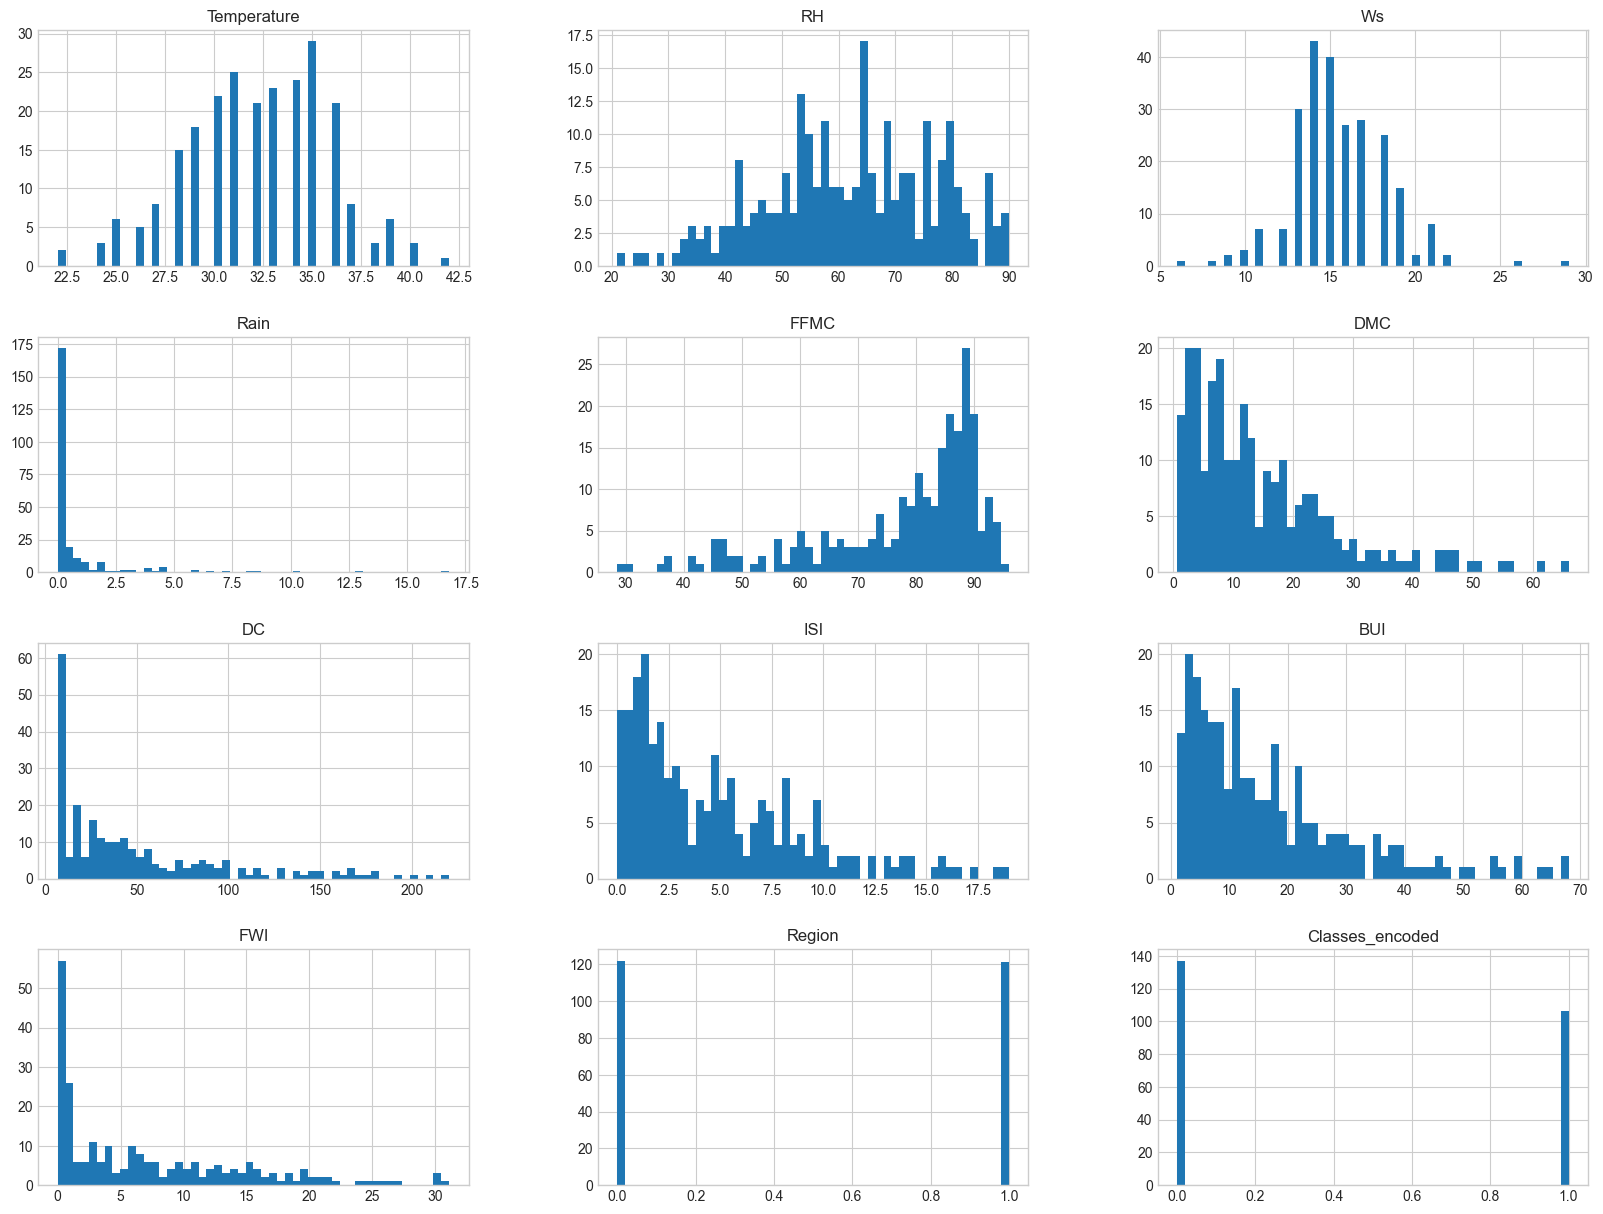

In [24]:
# Visualising all the features
plt.style.use('seaborn-v0_8-whitegrid')
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
percentage = df1['Classes'].value_counts(normalize=True) * 100
print(percentage)

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64


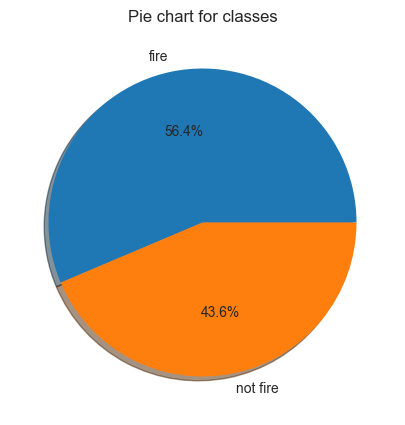

In [26]:
classlabel = ['fire', 'not fire']             # fire = 0 and not fire = 1 encoded values
plt.figure(figsize=(7,5))
plt.pie(percentage, labels = classlabel, autopct='%1.1f%%', shadow=True)
plt.title('Pie chart for classes')
plt.show()

In [30]:
# Finding correlation
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_encoded
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,-0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,-0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,-0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,-0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,-0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,-0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,-0.719216


In [29]:
del df1['Classes']

<Axes: >

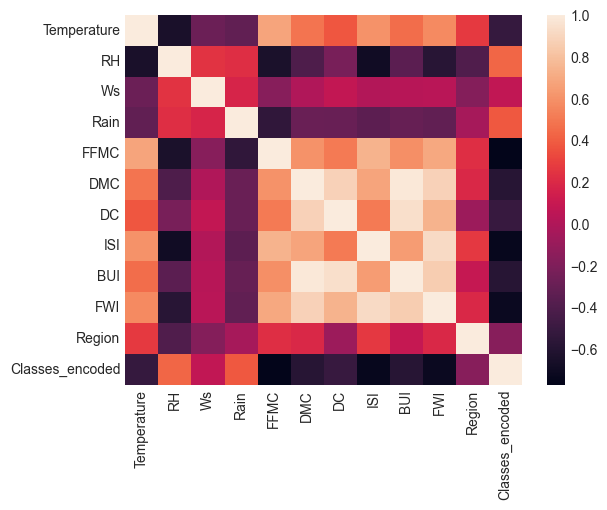

In [31]:
sns.heatmap(df1.corr())

In [32]:
# Monthly fire analysis
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire analysis of Sidi- bel Region')

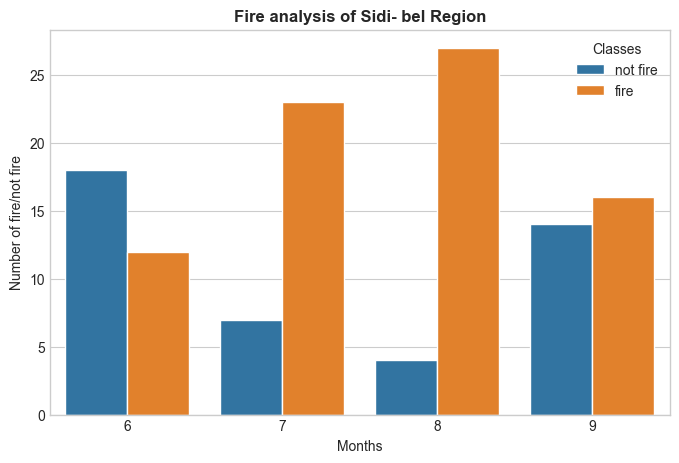

In [34]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.xlabel('Months')
plt.ylabel('Number of fire/not fire')
plt.title('Fire analysis of Sidi- bel Region', weight='bold')

Text(0.5, 1.0, 'Fire analysis of bejaje Region')

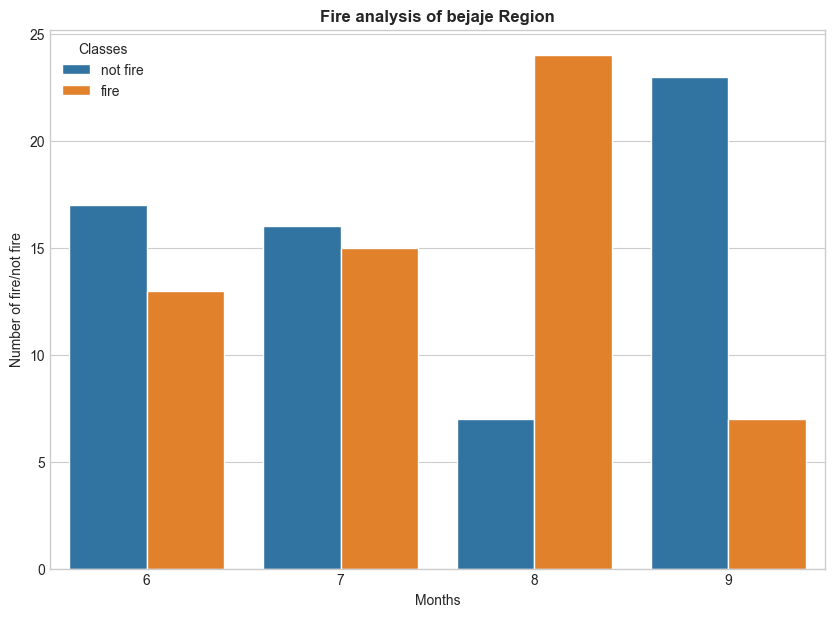

In [35]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.xlabel('Months')
plt.ylabel('Number of fire/not fire')
plt.title('Fire analysis of bejaje Region', weight='bold')

Observerd that most of the fire happens in both the region in the month of August.

and also the most fire happens likely in the month of June July and August.

In [36]:
df1.to_csv('new_data.csv')